# **Prueba Iris**

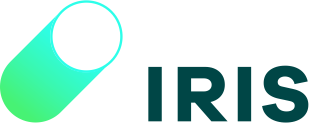


El fin de la siguiente prueba es explorar el conocimiento que se presenta sobre Python, para esto tendremos que  cargar, procesar y exponer una vista de datos sobre un Dataframe en Python.


# Parte 1. Transformaciones sobre conjuntos de datos

El banco  tiene el desafio de procesar tablas de clientes por transaccion, dicha informacion reposa en dos rutas diferentes como se muestra a continuacion:


Su tarea consiste en leer los archivos csv que se encuentran en la carpeta de Datos y realizar las siguientes tareas:

# 1. Clientes Unicos

La idea es generar un dataframe de clientes con todos resgistros de **clientes unicos** existentes en todos los archivos.

Nota: Se tiene en cuenta las funciones de optimizacion para cargar los datos


In [ ]:
# Primero importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import glob
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful


**Nota: Todos los archivos ponerlos aca mismo en el Notebook, en la sesion files, o archivos.**


In [ ]:
import pandas as pd
import glob

# Lista de archivos a leer (colgar archivos en la sesion files o archivos de este notebook)
archivos = [f"MOCK_DATA_{i}.csv" for i in range(1, 10)]

# Leer y concatenar los archivos en un solo DataFrame
df = pd.concat([pd.read_csv(archivo).drop(columns=["id"]) for archivo in archivos], ignore_index=True)


df

,nombre,apellido,email,genero,valor_tx,numero_identificacion,tipo_identificacion
0,Freddi,Giffaut,fgiffaut0@answers.com,Female,$104571.16,232219919,CC
1,Emmie,Simone,esimone1@arstechnica.com,Female,$260057.30,359867238,PP
2,Riley,Haack,rhaack2@ezinearticles.com,Male,$463707.55,966156703,PP
3,Libby,Hurle,lhurle3@guardian.co.uk,Female,$766231.08,814981127,IT
4,Marcia,Siddaley,msiddaley4@photobucket.com,Female,$261899.95,820247909,PP
...,...,...,...,...,...,...,...
8995,Marcile,Cameron,mcameronrn@live.com,Female,$743197.79,302357291,PP
8996,Lalo,Annandale,lannandalero@wordpress.org,Male,$568156.25,963489786,IT
8997,Fair,Saintpierre,fsaintpierrerp@bloglines.com,Male,$959336.61,576055007,CC
8998,Karin,Backman,kbackmanrq@vimeo.com,Female,$278490.92,773851569,PP


In [ ]:
duplicados = df[df.duplicated("numero_identificacion", keep=False)]
if not duplicados.empty:
    print("⚠️ Hay valores repetidos:")
    print(duplicados)
else:
    print("✅ No hay valores duplicado.")

✅ No hay valores duplicado.


# 2. Clientes Hash

Para este punto debe concatenar las columnas TIPO+NUMERO DE IDENTIFICACION y luego realizar un hash de ese valor, haciendo uso de cualquier libreria de cifrado. Opcional, hacer uso del metodo de encrypt_string

In [ ]:
# Funcion hash
def encrypt_string(hash_string):
    sha_signature = \
        hashlib.sha256(hash_string.encode()).hexdigest()
    return sha_signature

In [ ]:
# Concateno las columnas tipo_identificacion y numero_identificacion
df['hash_identificacion'] = df['tipo_identificacion'] + df['numero_identificacion'].astype(str)

In [ ]:
# Genero el hash para cada fila  en la nueva columna
df['hash_identificacion'] = df['hash_identificacion'].apply(encrypt_string)

In [ ]:
df

,nombre,apellido,email,genero,valor_tx,numero_identificacion,tipo_identificacion,hash_identificacion
0,Freddi,Giffaut,fgiffaut0@answers.com,Female,$104571.16,232219919,CC,e798c45c2f0238de52899540f1f3a39dca4f0f555bcff1...
1,Emmie,Simone,esimone1@arstechnica.com,Female,$260057.30,359867238,PP,660988ad205e04622e468c043c55fca81f0305eefc5d9d...
2,Riley,Haack,rhaack2@ezinearticles.com,Male,$463707.55,966156703,PP,16e70d31143d240229c0a09858a2bbeec41d46a9a6576c...
3,Libby,Hurle,lhurle3@guardian.co.uk,Female,$766231.08,814981127,IT,10ef61638b2fbbfe63d7bdd0df63b4e509560be2dad3cb...
4,Marcia,Siddaley,msiddaley4@photobucket.com,Female,$261899.95,820247909,PP,be112370d6353f8b301d2aa0d77a278264dcc6e4090103...
...,...,...,...,...,...,...,...,...
8995,Marcile,Cameron,mcameronrn@live.com,Female,$743197.79,302357291,PP,56801a56037d11f28b7ef9c5f8e236b9b823103a7f0825...
8996,Lalo,Annandale,lannandalero@wordpress.org,Male,$568156.25,963489786,IT,a82e2cb2342ccc3dcd0c4b2173025fcd5ee7c1d14984b5...
8997,Fair,Saintpierre,fsaintpierrerp@bloglines.com,Male,$959336.61,576055007,CC,7ed57b8ca87fc221a4a4e208583b309171ca7f455d3e70...
8998,Karin,Backman,kbackmanrq@vimeo.com,Female,$278490.92,773851569,PP,041be7b55f5494931686f1c2fc4917fa4f9aa9272874c5...


# 3. Transacciones

Por ultimo debe sacar un top 10 de los clientes que tienen las transacciones mas altas.

In [ ]:
df.dtypes

,0
nombre,object
apellido,object
email,object
genero,object
valor_tx,object
numero_identificacion,int64
tipo_identificacion,object
hash_identificacion,object


In [ ]:
# Limpiar valor_tx
df['valor_tx'] = df['valor_tx'].replace({'\$': '', ',': ''}, regex=True)

In [ ]:
# Convertir a tipo numérico (float)
df['valor_tx'] = pd.to_numeric(df['valor_tx'], errors='coerce')

In [ ]:
# Top 10 de transacciones más altas
top_10_clientes = df.sort_values(by='valor_tx', ascending=False).head(10)

In [ ]:
top_10_clientes[['nombre', 'apellido', 'valor_tx']]

,nombre,apellido,valor_tx
3630,Dar,Rumbelow,999883.83
211,Say,Dowse,999686.12
3465,Tye,Foffano,999655.02
8220,Abra,Halksworth,999540.21
8422,Mariellen,Cholonin,999479.22
6263,Zonnya,McFie,999385.00
4643,Sherwin,Sircomb,999347.30
2435,Charlotta,Channing,999186.30
6174,Jeri,Koopman,999131.19
8414,Gennie,Satford,999089.85


# Parte 2: Bases de datos y SQL

### 4. Base de Datos

Apartir de la siguiente base de datos y tabla de SQLITE previamente creadas, genere unos querys con Datos de prueba.

Las sentencias que debe realizar son:
* INSERT
* UPDATE
* DELETE


Cada sentencia ejecutela en una celda independiente para ver los resultados por consola

In [ ]:

import sqlite3

# Connecting to sqlite
connection_obj = sqlite3.connect('iris.db')

# cursor object
cursor_obj = connection_obj.cursor()


# Creating table
table = """ CREATE TABLE IRIS_CLIENT (
            Email VARCHAR(255) NOT NULL,
            First_Name CHAR(25) NOT NULL,
            Last_Name CHAR(25),
            Score INT
        ); """

cursor_obj.execute(table)

print("Table is Ready")

# Close the connection
connection_obj.close()

Table is Ready


In [ ]:
# Connecting to sqlite
connection_obj = sqlite3.connect('iris.db')

# Cursor
cursor_obj = connection_obj.cursor()

In [ ]:
# Datos ficticios a insertar
clientes = [
    ('fgiffaut0@answers.com', 'Freddi', 'Giffaut', 95),
    ('jdoe1@example.com', 'John', 'Doe', 88),
    ('alice_smith@domain.com', 'Alice', 'Smith', 91),
    ('bob.jones@company.com', 'Bob', 'Jones', 85),
    ('charlie.brown@website.com', 'Charlie', 'Brown', 78)
]

clientes

[('fgiffaut0@answers.com', 'Freddi', 'Giffaut', 95),
 ('jdoe1@example.com', 'John', 'Doe', 88),
 ('alice_smith@domain.com', 'Alice', 'Smith', 91),
 ('bob.jones@company.com', 'Bob', 'Jones', 85),
 ('charlie.brown@website.com', 'Charlie', 'Brown', 78)]

In [ ]:
# Insertar los datos
cursor_obj.executemany("INSERT INTO IRIS_CLIENT (Email, First_Name, Last_Name, Score) VALUES (?, ?, ?, ?)", clientes)

In [ ]:
# Consultar todos los registros de la tabla IRIS_CLIENT
cursor_obj.execute("SELECT * FROM IRIS_CLIENT")

In [ ]:
# Obtener todos los resultados
rows = cursor_obj.fetchall()

In [ ]:
rows

[('fgiffaut0@answers.com', 'Freddi', 'Giffaut', 95),
 ('jdoe1@example.com', 'John', 'Doe', 88),
 ('alice_smith@domain.com', 'Alice', 'Smith', 91),
 ('bob.jones@company.com', 'Bob', 'Jones', 85),
 ('charlie.brown@website.com', 'Charlie', 'Brown', 78)]

In [ ]:
cursor_obj = connection_obj.cursor()

# Actualizar el Score de Charlie
cursor_obj.execute("""
    UPDATE IRIS_CLIENT
    SET Score = 90
    WHERE Email = 'charlie.brown@website.com'
""")

In [ ]:
connection_obj.commit()

print("Registro actualizado correctamente.")

Registro actualizado correctamente.


In [ ]:
# Mostrar el nuevo Score de Charlie actualizado a 90.
cursor_obj.execute("SELECT * FROM IRIS_CLIENT WHERE Email = 'charlie.brown@website.com'")
print(cursor_obj.fetchall())

[('charlie.brown@website.com', 'Charlie', 'Brown', 90)]


In [ ]:
# Eliminar los registros con Score menor a 90
cursor_obj.execute("DELETE FROM IRIS_CLIENT WHERE Score < 90")

In [ ]:
connection_obj.commit()

print("Registros eliminados correctamente.")

Registros eliminados correctamente.


In [ ]:
# Query para consultar los registros actualizados
cursor_obj.execute("SELECT * FROM IRIS_CLIENT")
rows = cursor_obj.fetchall()

In [ ]:
# Mostrar los registros
rows

[('fgiffaut0@answers.com', 'Freddi', 'Giffaut', 95),
 ('alice_smith@domain.com', 'Alice', 'Smith', 91),
 ('charlie.brown@website.com', 'Charlie', 'Brown', 90)]

In [ ]:
# Cerrar la conexión
connection_obj.close()

### Pregunta 1: ¿Cuáles son las diferencias entre OLTP y OLAP?


1. OLTP maneja transacciones diarias y operaciones en tiempo real, un ejemplo sería las transacciones de un banco; mientras que una base de datos OLAP son diseñadas para análisis de datos históricos, datos pasados, estudiarlos y tomar de decisiones.
2. En cuanto a la estrucutra de datos y como se organizan, los sistemas OLTP usan una base de datos altamente normalizada, se organizan en tablas y relaciones bien definidas; OLAP usa una estructura desnormalizada que suele organizarse en una estrucura de copo de nieve o estrella, lo cual lo hace más veloz
3. Los tiempos de procesamiento del OLAP suelen ser más largos varian de minutos a horas según el tipo y el volumen de datos que se analicen; los OLTP  procensan en tiempo real, al ser transacciones, están necesitan ser procesadas de manera más rápida  

### Pregunta 2: ¿Qué es una función definida por el usuario? ¿Cuáles son sus distintos tipos?

Una función definida por el usuario es una función creada por un usuario en una base de datos para ejecutar operaciones personalizadas, como cálculos o transformaciones de datos. Además estas funciones son reutilizables, permiten reutilizar código.

Los tipos son:
- Funciones Escalares que devuelven un valor único, como el cálculo de la edad, conversión de datos, etc.
- Table value functions (TVF) que no devuelve un solo valor sino una tabla, devuelve un subconjunto de datos
- Inline Table-Valued Functions, que son parecidas a TVF pero más eficientes.

### Pregunta 3: ¿Cuál es la diferencia entre índice agrupado y no agrupado?

El índice agrupado ordena y almacena físicamente los datos en la tabla según la clave del índice, una fila no puede tener el mismo índice mientrás que los indices no agrupados solo crea un puntero que apunta, valga la redundancia, a la ubicación de los datos, te dice donde esta

# Parte 3: Data Quality

Esta prueba está diseñada para evaluar tus habilidades en el aseguramiento de la calidad de datos. Completa cada pregunta en el notebook, utilizando Python y sus bibliotecas comunes para análisis de datos como pandas y numpy.

## Pregunta 1: Detección de Valores Nulos
Carga el conjunto de datos `data_quality.csv` y responde:

1. ¿Cuántos valores nulos hay en cada columna?
2. Realiza un análisis estadistico (Moda, Media y Mediana) sobre el campo age.



In [ ]:
import pandas as pd

df = pd.read_csv('data_quality.csv')

In [ ]:
df

,id_number,id_type,name,phone,email,address,region,postalZip,country,age
0,30104834-3,TI,Xyla Tyson,(823) 874-8104,nonummy.ultricies.ornare@icloud.org,"P.O. Box 425, 9537 Netus Av.",East Region,381374,Turkey,NaN
1,5077544-5,PS,Kato Drake,(542) 777-9878,nisi.mauris@outlook.edu,Ap #127-1331 Justo St.,Valparaíso,38587,Sweden,47
2,3712955-0,PS,Audrey Travis,1-737-158-5417,ac.risus@aol.net,499-8818 Pharetra Road,Warmińsko-mazurskie,243550,Australia,38
3,2334423-8,NIT,Haviva Stein,(556) 725-3349,velit.aliquam.nisl@aol.ca,Ap #459-7076 Penatibus St.,Khánh Hòa,1381,South Korea,44
4,14217451-0,X,Lewis Hutchinson,(877) 532-5692,aliquet.sem@icloud.edu,Ap #505-2595 Nunc Ave,Stockholms län,48878,Indonesia,56
...,...,...,...,...,...,...,...,...,...,...
542,38580250-1,NIT,Laura Nixon,(991) 329-3835,proin.dolor@icloud.org,Ap #855-3592 Volutpat Road,Valle del Cauca,033685,Philippines,54
543,5554144-2,TI,Carter Mcintyre,1-143-623-0283,est.nunc@outlook.org,368-1417 Consectetuer Road,Flintshire,85882,Mexico,46
544,34864405-K,PS,Cynthia Cote,1-434-214-7471,mollis@aol.org,"P.O. Box 169, 1188 Dui, Road",Antwerpen,564580,Poland,26
545,20528417-6,TI,Nathaniel Adams,(561) 258-5248,ut.ipsum@outlook.ca,"P.O. Box 378, 9253 Nunc. Av.",Gelderland,5534,Turkey,58


In [ ]:
# Contar valores nulos por columna
nulos_por_columna = df.isnull().sum()

nulos_por_columna

,0
id_number,0
id_type,0
name,0
phone,0
email,0
address,0
region,0
postalZip,0
country,0
age,49


In [ ]:
df.dtypes

,0
id_number,object
id_type,object
name,object
phone,object
email,object
address,object
region,object
postalZip,object
country,object
age,object


In [ ]:
# Media, mediana y moda de age

# Convertimos age a dato numerico
df['age'] = pd.to_numeric(df['age'], errors='coerce')

media = df['age'].mean()      # Media
mediana = df['age'].median()  # Mediana
moda = df['age'].mode()[0]    # Moda

In [ ]:
# Mostrar resultados con dos decimales usando f-strings
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")

Media: 39.22
Mediana: 40.00
Moda: 28.00


## Pregunta 2: Detección de Valores Duplicados
Determina si existen filas duplicadas en el dataset. Si es así, elimina las filas duplicadas y guarda el conjunto de datos limpio como `data_cleaned.csv`.


In [ ]:
# Eliminar filas duplicadas
df_sin_duplicados = df.drop_duplicates()

# Guarda el nuevo dataset sin duplicados
df_sin_duplicados.to_csv('data_cleaned.csv', index=False)

df_sin_duplicados

,id_number,id_type,name,phone,email,address,region,postalZip,country,age
0,30104834-3,TI,Xyla Tyson,(823) 874-8104,nonummy.ultricies.ornare@icloud.org,"P.O. Box 425, 9537 Netus Av.",East Region,381374,Turkey,NaN
1,5077544-5,PS,Kato Drake,(542) 777-9878,nisi.mauris@outlook.edu,Ap #127-1331 Justo St.,Valparaíso,38587,Sweden,47.0
2,3712955-0,PS,Audrey Travis,1-737-158-5417,ac.risus@aol.net,499-8818 Pharetra Road,Warmińsko-mazurskie,243550,Australia,38.0
3,2334423-8,NIT,Haviva Stein,(556) 725-3349,velit.aliquam.nisl@aol.ca,Ap #459-7076 Penatibus St.,Khánh Hòa,1381,South Korea,44.0
4,14217451-0,X,Lewis Hutchinson,(877) 532-5692,aliquet.sem@icloud.edu,Ap #505-2595 Nunc Ave,Stockholms län,48878,Indonesia,56.0
...,...,...,...,...,...,...,...,...,...,...
495,15617873-K,PS,Hyatt Marquez,1-164-237-1848,consequat.enim@yahoo.ca,522-709 Dolor Road,Antofagasta,311743,India,40.0
496,12147230-9,X,Roary Hale,(256) 226-7907,enim@aol.edu,154-1588 Placerat St.,Flevoland,35212,Belgium,35.0
497,3280433-0,TI,Cameran Serrano,1-553-174-2267,eu@outlook.org,790-6766 Quisque Ave,Australian Capital Territory,20546,Russian Federation,NaN
498,42998205-7,NIT,Lareina Davis,1-262-417-4480,neque.non@hotmail.couk,8584 Mi Avenue,Limburg,36703,Peru,52.0




## Pregunta 3: Validación de Rango de Valores
Supongamos que la columna `age` debería contener únicamente valores entre 0 y 60. Escribe código para identificar valores fuera de este rango y reemplázalos con la mediana de valores válidos.


In [ ]:
"""
Filtro las filas con edades entre 0 y 60,
ya que son las únicas filas válidas en el ejemplo hipotético
para luego sacar la mediana.
"""
valores_validos = df_sin_duplicados['age'][(df_sin_duplicados['age'] >= 0) & (df_sin_duplicados['age'] <= 60)]

# Calcular la mediana de los valores válidos
mediana_valores_validos = round(valores_validos.median())

mediana_valores_validos

38

In [ ]:
# Reemplazo los valores fuera de rango y los valores nulos con la mediana
df_sin_duplicados['age'] = df_sin_duplicados['age'].apply(lambda x: mediana_valores_validos if (x < 0 or x > 60 or pd.isnull(x)) else x)

df_sin_duplicados

<ipython-input-36-c1843de8a283>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados['age'] = df_sin_duplicados['age'].apply(lambda x: mediana_valores_validos if (x < 0 or x > 60 or pd.isnull(x)) else x)


,id_number,id_type,name,phone,email,address,region,postalZip,country,age
0,30104834-3,TI,Xyla Tyson,(823) 874-8104,nonummy.ultricies.ornare@icloud.org,"P.O. Box 425, 9537 Netus Av.",East Region,381374,Turkey,38.0
1,5077544-5,PS,Kato Drake,(542) 777-9878,nisi.mauris@outlook.edu,Ap #127-1331 Justo St.,Valparaíso,38587,Sweden,47.0
2,3712955-0,PS,Audrey Travis,1-737-158-5417,ac.risus@aol.net,499-8818 Pharetra Road,Warmińsko-mazurskie,243550,Australia,38.0
3,2334423-8,NIT,Haviva Stein,(556) 725-3349,velit.aliquam.nisl@aol.ca,Ap #459-7076 Penatibus St.,Khánh Hòa,1381,South Korea,44.0
4,14217451-0,X,Lewis Hutchinson,(877) 532-5692,aliquet.sem@icloud.edu,Ap #505-2595 Nunc Ave,Stockholms län,48878,Indonesia,56.0
...,...,...,...,...,...,...,...,...,...,...
495,15617873-K,PS,Hyatt Marquez,1-164-237-1848,consequat.enim@yahoo.ca,522-709 Dolor Road,Antofagasta,311743,India,40.0
496,12147230-9,X,Roary Hale,(256) 226-7907,enim@aol.edu,154-1588 Placerat St.,Flevoland,35212,Belgium,35.0
497,3280433-0,TI,Cameran Serrano,1-553-174-2267,eu@outlook.org,790-6766 Quisque Ave,Australian Capital Territory,20546,Russian Federation,38.0
498,42998205-7,NIT,Lareina Davis,1-262-417-4480,neque.non@hotmail.couk,8584 Mi Avenue,Limburg,36703,Peru,52.0


In [ ]:
# Verificar si hay valores menores a 0 o mayores a 60 en age
valores_fuera_rango = df_sin_duplicados[(df_sin_duplicados['age'] < 0) | (df_sin_duplicados['age'] > 60)]

valores_fuera_rango

,id_number,id_type,name,phone,email,address,region,postalZip,country,age




## Pregunta 4: Consistencia de Formato
Revisa la columna `id_number` que contiene la siguiente estructura {Numero}[8]-{Numero}[1], es decir esta compuesto por ocho valores numericos seguido de un '-' y luego un digito de verificacion. En este caso debe validar que todos los valores cumplan con esta condicion de tener 8 caracteres en la primera parte seguido de un '-' y luego con un numero.

No debe contener letras en el numero de verificacion, en caso tal. Se debe reemplazar por 0.

En la primera parte la longitud de ser de 8 caracteres numericos, si no tiene esa condicion se debe completar con 0s en la parte final.


In [ ]:
# Verificar si hay duplicados en la columna 'id_number'
duplicados = df_sin_duplicados[df_sin_duplicados['id_number'].duplicated()]

# Mostrar los duplicados si existen
if not duplicados.empty:
    print("Existen valores duplicados en la columna 'id_number':")
    print(duplicados)
else:
    print("No hay valores duplicados en la columna 'id_number'.")

No hay valores duplicados en la columna 'id_number'.


In [ ]:
# Función para validar y corregir el formato del 'id_number'
def validar_id_number(id_number):
    # Separar la parte antes y después del '-'
    partes = id_number.split('-')

    # Verificar si la primera parte tiene 8 caracteres numéricos
    if len(partes[0]) != 8 or not partes[0].isdigit():
        # Si no tiene 8 caracteres, completar con ceros
        partes[0] = partes[0][:8].ljust(8, '0')

    # Verificar la segunda parte (después del '-') sea un número
    if len(partes) == 2 and partes[1].isdigit():
        # Si es un número, mantenerlo
        pass
    else:
        # Si no es un número, reemplazar con '0'
        partes[1] = '0'

    # Unir las partes corregidas
    return '-'.join(partes)

In [ ]:
# Aplicar la función para corregir todos los valores en la columna 'id_number'
df_sin_duplicados['id_number'] = df_sin_duplicados['id_number'].apply(validar_id_number)

# Mostrar el DataFrame corregido
df_sin_duplicados

<ipython-input-40-1671b6f95812>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados['id_number'] = df_sin_duplicados['id_number'].apply(validar_id_number)


,id_number,id_type,name,phone,email,address,region,postalZip,country,age
0,30104834-3,TI,Xyla Tyson,(823) 874-8104,nonummy.ultricies.ornare@icloud.org,"P.O. Box 425, 9537 Netus Av.",East Region,381374,Turkey,38.0
1,50775440-5,PS,Kato Drake,(542) 777-9878,nisi.mauris@outlook.edu,Ap #127-1331 Justo St.,Valparaíso,38587,Sweden,47.0
2,37129550-0,PS,Audrey Travis,1-737-158-5417,ac.risus@aol.net,499-8818 Pharetra Road,Warmińsko-mazurskie,243550,Australia,38.0
3,23344230-8,NIT,Haviva Stein,(556) 725-3349,velit.aliquam.nisl@aol.ca,Ap #459-7076 Penatibus St.,Khánh Hòa,1381,South Korea,44.0
4,14217451-0,X,Lewis Hutchinson,(877) 532-5692,aliquet.sem@icloud.edu,Ap #505-2595 Nunc Ave,Stockholms län,48878,Indonesia,56.0
...,...,...,...,...,...,...,...,...,...,...
495,15617873-0,PS,Hyatt Marquez,1-164-237-1848,consequat.enim@yahoo.ca,522-709 Dolor Road,Antofagasta,311743,India,40.0
496,12147230-9,X,Roary Hale,(256) 226-7907,enim@aol.edu,154-1588 Placerat St.,Flevoland,35212,Belgium,35.0
497,32804330-0,TI,Cameran Serrano,1-553-174-2267,eu@outlook.org,790-6766 Quisque Ave,Australian Capital Territory,20546,Russian Federation,38.0
498,42998205-7,NIT,Lareina Davis,1-262-417-4480,neque.non@hotmail.couk,8584 Mi Avenue,Limburg,36703,Peru,52.0




---

Atención: Asegúrate de cargar el conjunto de datos `data_quality.csv` en el mismo directorio que este notebook para realizar la prueba. Corrige y anota cualquier problema adicional que encuentres mientras trabajas en los datos.

Buena suerte.

In [ ]:
# Comprobar que tienen la estrucutra de guion
filas_sin_guion = df_sin_duplicados[~df_sin_duplicados['id_number'].str.contains('-')]

filas_sin_guion

,id_number,id_type,name,phone,email,address,region,postalZip,country,age


In [ ]:
# Compruebo que no haya filas con longitud distinta a 8 antes del guion y que sean digitos
filas_con_error = df_sin_duplicados[~df_sin_duplicados['id_number'].str.match(r'^\d{8}-')]

filas_con_error

,id_number,id_type,name,phone,email,address,region,postalZip,country,age


In [ ]:
# Compruebo que todas las filas tengan un digito despues del guion
filas_error = df_sin_duplicados[df_sin_duplicados['id_number'].str.match(r'^\d{8}-\d{2,}$')]

filas_error

,id_number,id_type,name,phone,email,address,region,postalZip,country,age


## Logica de Programacion

**1. Escribe una función que devuelva los elementos en posiciones impares en una lista. Los elementos 'None' deben descartarse primero**


Nota: todos los casos del ejemplo se deben probar


Ejemplos:

<br>```odd([1,2,3,4,5,6,7,8]) = [2,4,6,8]```
<br>```odd([0,1,2,3,4,5,6,7,8]) = [1,3,5,7]```
<br>```odd([]) = []```
<br>```odd([None, None, None]) = []```
<br>```odd([None,1,2,3,4,5,6,7,8]) = [2,4,6,8]```

In [ ]:
def odd(lst):
    # Filtro los valores None para no tenerlos en cuenta
    filtered_lst = [x for x in lst if x is not None]
    return filtered_lst[1::2]  # Devuelve los elementos en posiciones impares

# Casos de prueba
print(odd([1, 2, 3, 4, 5, 6, 7, 8]))
print(odd([0, 1, 2, 3, 4, 5, 6, 7, 8]))
print(odd([]))
print(odd([None, None, None]))
print(odd([None, 1, 2, 3, 4, 5, 6, 7, 8]))

[2, 4, 6, 8]
[1, 3, 5, 7]
[]
[]
[2, 4, 6, 8]


**2. Escribe una función que combine dos listas tomando elementos alternativamente.**

Nota: todos los casos del ejemplo se deben probar


Ejemplos:
[texto del vínculo](https://)

<br>```alternate([a,b,c], [1,2,3]) = [a,1,b,2,c,3]```
<br>```alternate([1,3,5], [2,4,6]) = [1,2,3,4,5,6]```
<br>```alternate([1,2,3], [4,5,6]) = [1,4,3,5,3,6]```

In [ ]:
from itertools import zip_longest

# Combino las listas y si tienen distinta longitud, combino intercalado y de la lista mas larga pongo el resto
def alternate(lst1, lst2):
    return [item for pair in zip_longest(lst1, lst2) for item in pair if item is not None]

print(alternate(['a', 'b', 'c'], [1, 2, 3]))
print(alternate([1, 3, 5], [2, 4, 6]))
print(alternate([1, 2, 3], [4, 5, 6]))
print(alternate([1, 2, 3, 4, 'g', 0], [4, 5, 6]))
print(alternate([1, 2, 3, 4, 'g', 0], [4, 5, 6, 'hola', 12, 3, 3, 4, 67]))

['a', 1, 'b', 2, 'c', 3]
[1, 2, 3, 4, 5, 6]
[1, 4, 2, 5, 3, 6]
[1, 4, 2, 5, 3, 6, 4, 'g', 0]
[1, 4, 2, 5, 3, 6, 4, 'hola', 'g', 12, 0, 3, 3, 4, 67]


#### 3. Dada una lista desordenada de números enteros con valores repetidos, elimine los valores repetidos en una nueva lista.

No es necesario ordenar la lista de resultados; sin embargo, en los ejemplos siguientes, los resultados sí están ordenados.


Nota: Todos los casos de ejemplo se deben probar

Ejemplos:
<br>```drop_duplicates([1,3,5,7,15,3,12,10,5,20,10,5]) = [1, 3, 5, 7, 10, 12, 15, 20]```
<br>```drop_duplicates([1,3,5,7,15,12,10,20]) = [1, 3, 5, 7, 10, 12, 15, 20]```
<br>```drop_duplicates([1,3,5,7,15,3,12,10,5,20,None,5]) = [1, 3, 5, 7, 10, 12, 15, 20]```
<br>```drop_duplicates([]) = []```
<br>```drop_duplicates([None, None, None]) = []```


In [ ]:
def drop_duplicates(lst):

    # Filtro para que no me traiga None y devuelvo ordenado
    return sorted(set(filter(lambda x: x is not None, lst)))


print(drop_duplicates([1,3,5,7,15,3,12,10,5,20,10,5]))
print(drop_duplicates([1,3,5,7,15,12,10,20]))
print(drop_duplicates([1,3,5,7,15,3,12,10,5,20,None,5]))
print(drop_duplicates([]))
print(drop_duplicates([None, None, None]))
print(drop_duplicates([-10, -5, -10, 0, 5, 10, 5, -5]))
print(drop_duplicates([0, 0, 0, None, 0, 0, None]))

[1, 3, 5, 7, 10, 12, 15, 20]
[1, 3, 5, 7, 10, 12, 15, 20]
[1, 3, 5, 7, 10, 12, 15, 20]
[]
[]
[-10, -5, 0, 5, 10]
[0]


#### 4. Dado el archivo *contacts.csv*, escriba un script para leer el archivo y permitir buscar un nombre e imprimir la información como se muestra en el ejemplo.

Ejemplo:

<br>```find_contcat('John Doe')
Output:
    Jhon Doe:
        Phone: +57 3216549
        Address: Fake St. 123```
    
<br>```find_contcat('john doe')
Output:
    Jhon Doe:
        Phone: +57 3216549
        Address: Fake St. 123```





In [ ]:
import pandas as pd

df = pd.read_csv("contacts.csv")

def find_contact(name):
    # Normalizo la entrada del nombre eliminando espacios y convirtiendo a minuscula
    name_cleaned = name.replace(" ", "").lower()

    # Buso en el el nombre dataset eliminando espacios de los nombres y en minuscula
    match = df[df["name"].str.replace(" ", "").str.lower() == name_cleaned]

    if not match.empty:
        for _, row in match.iterrows():
            print(f"{row['name']}: Phone: {row['phone']} Address: {row['address']}")
    else:
        print("Usuario no encontrado.")

# Ejemplo de uso
find_contact("kasPer JoycE")

Kasper Joyce: Phone: (783) 575-3047 Address: Ap #880-4780 Sem St.


In [ ]:
df

,name,phone,address,email,numberrange,country
0,Kasper Joyce,(783) 575-3047,Ap #880-4780 Sem St.,aliquam.arcu@aol.org,6,Austria
1,Damon Cash,(757) 236-2716,Ap #653-266 Donec Rd.,ac.ipsum.phasellus@protonmail.net,8,Sweden
2,Penelope Fisher,(224) 778-3584,Ap #917-5841 Urna. St.,aliquam.nec.enim@protonmail.couk,5,France
3,Kai Fuller,1-812-785-3666,7611 Dui. Street,tempus.scelerisque@outlook.net,0,Canada
4,Tyrone Owens,(472) 158-8541,Ap #664-7895 Neque. Road,scelerisque.sed.sapien@icloud.com,1,Nigeria
...,...,...,...,...,...,...
495,Burton Rosa,(332) 137-4421,Ap #866-2543 Sagittis. St.,risus.quis@icloud.couk,3,Canada
496,Britanney Baxter,(135) 734-4873,972-6934 Ipsum Street,dui@protonmail.ca,3,Austria
497,Timothy Kent,(378) 344-1843,"P.O. Box 586, 1971 Quis, Ave",vel.convallis@hotmail.org,7,New Zealand
498,Lev Finch,(527) 631-2413,"2111 Eget, Rd.",turpis.non@hotmail.couk,6,Mexico
